Загрузка библиотек

In [49]:
!pip install osmnx
!pip install neo4j

Импорт библиотек

In [ ]:
import osmnx as ox
import pandas as pd

ox.settings.log_console = True
ox.__version__

'1.9.4'

features.features_from_place Получает данные по тегам

In [ ]:
#q=ox.features.features_from_place("Tula,RU", tags={'name':True,'bus':True, 'trolleybus':True, 'railway':True, 'tram':True} )
q=ox.features.features_from_place("Тула", tags={'type':True} )
#q=ox.features.features_from_place("Tula,RU", tags={'relation':True} )
#q=ox.features.features_from_place("Tula,RU", tags={'relation':True} )

Вывод данных

In [ ]:
pd.set_option('display.max_columns', None)
print(q[q['type']!="multipolygon"])

                        railway  \
element_type osmid                
node         1304576061     NaN   
relation     81993          NaN   
             4775559        NaN   
             5663147        NaN   
             5663235        NaN   
             5663250        NaN   
             5663270        NaN   
             5663284        NaN   

                                                                  geometry  \
element_type osmid                                                           
node         1304576061                          POINT (37.53080 54.11427)   
relation     81993       POLYGON ((35.89856 53.85018, 35.90008 53.84917...   
             4775559     POLYGON ((37.15314 54.24268, 37.15319 54.24593...   
             5663147     POLYGON ((37.26771 54.32245, 37.26927 54.32272...   
             5663235     POLYGON ((37.15319 54.24593, 37.16287 54.25081...   
             5663250     POLYGON ((37.62076 54.20122, 37.62109 54.20152...   
             5663270     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Настройки для получения данных для графа и вывод вершин

In [ ]:
ox.settings.useful_tags_way += ["route"]
ox.settings.useful_tags_way += ["railway"]
#ox.settings.useful_tags_way += ["railway"]
ox.settings.useful_tags_node +=["name"]
ox.settings.useful_tags_node +=["bus"]
ox.settings.useful_tags_node +=["trolleybus"]
ox.settings.useful_tags_node +=["tram"]
#ox.settings.useful_tags_way += ["bus"]
G = ox.graph_from_place(
    "Тульская область",
    retain_all=True,
    truncate_by_edge=True,
    simplify=True,
    network_type='drive'
   # network_type='all',
 #   network_type='all_public',
#    custom_filter='["bus"~"yes"]',
#   custom_filter = '["public_transport"~"stop_position|platform|station|stop_area|stop_area_group"]',
#custom_filter = '["public_transport"]',
 #   custom_filter='["Relation"]',
)
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G)

#print(gdf_relationships.head(5), "\n")
#fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)
#fet = ox.features_from_place("Moscow,Moscow,RU", tags='["bus"~"yes"]')
print(gdf_nodes)
#print(gdf_relationships)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:254: UserWarning: This area is 12 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


                     y          x          highway  street_count name  bus  \
osmid                                                                        
229233331    53.093586  38.157470  traffic_signals             3  NaN  NaN   
229233366    53.164249  38.152015              NaN             3  NaN  NaN   
347351223    53.242241  37.975475              NaN             3  NaN  NaN   
347351224    53.230690  37.982658              NaN             3  NaN  NaN   
347351225    53.226520  37.984041              NaN             3  NaN  NaN   
...                ...        ...              ...           ...  ...  ...   
10560328820  54.126829  36.281561              NaN             1  NaN  NaN   
10560328951  54.134110  36.274269              NaN             1  NaN  NaN   
10560328969  54.132090  36.273330              NaN             3  NaN  NaN   
11304546979  54.100975  36.239627              NaN             1  NaN  NaN   
11812602249  54.205285  36.291226              NaN             1

Вывод ребер

In [ ]:
print(gdf_relationships)
#print(gdf_relationships[gdf_relationships['route']== gdf_relationships['route']])
#print(gdf_nodes[gdf_nodes['name']== gdf_nodes['name']])

                                             osmid lanes        highway  \
u           v           key                                               
229233331   1030513515  0                 95560448     2        primary   
            670416242   0                 95560448     2        primary   
229233366   1217866945  0                 34622240   NaN    residential   
            402330508   0    [124085109, 34622253]   NaN      secondary   
            469201638   0                 34622253   NaN      secondary   
...                                            ...   ...            ...   
10560328969 3931703712  0                808725974   NaN    residential   
            1829261735  0                808725974   NaN    residential   
            10560328951 0               1132566448   NaN  living_street   
11304546979 2262775110  0                216960274   NaN    residential   
11812602249 1898438655  0               1272091264   NaN   unclassified   

                        

Работа с геофреймом, добавление osmid и класса ("node","relation")

In [ ]:
# Работа дата фреймов добавление
a=[]
b=[]
for idx, row in q.iterrows():
  #print(row)
  #print(idx)
  #q['osmid']=idx[1]
 a.append(idx[1])
 b.append(idx[0])
q['osmid']=a
q['class']=b

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Пример поиска по данным

In [ ]:
#class1 = q[(q["osmid"] == 12299040595)]
class1 = q[ (q["bus"] == "yes") | (q["train"] == "yes")]
print(class1[['bus','train']])

                         bus train
element_type osmid                
node         281331396   yes   NaN
             305390572   NaN   yes
             305391147   NaN   yes
             305391155   NaN   yes
             310741876   NaN   yes
...                      ...   ...
way          1208115365  NaN   yes
             1208137045  NaN   yes
             1208137046  NaN   yes
relation     358677      NaN   yes
             14691774    yes   NaN

[968 rows x 2 columns]


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
print(list(q.columns))

['railway', 'railway:position', 'geometry', 'crossing', 'highway', 'name', 'public_transport', 'tram', 'bus', 'alt_name', 'alt_name:en', 'alt_name:ru', 'esr:user', 'name:en', 'name:ru', 'operator', 'operator:branch', 'train', 'uic_name', 'uic_ref', 'old_name', 'wikidata', 'wikipedia', 'bench', 'bin', 'lit', 'shelter', 'tactile_paving', 'mapillary', 'survey:date', 'trolleybus', 'covered', 'amenity', 'share_taxi', 'access', 'type', 'crossing:barrier', 'crossing:bell', 'crossing:light', 'supervised', 'local_ref', 'departures_board', 'ref', 'was:railway', 'wheelchair', 'barrier', 'source', 'traffic_signals:direction', 'button_operated', 'crossing:island', 'traffic_signals:sound', 'traffic_signals:vibration', 'phone', 'website', 'check_date:shelter', 'note', 'surface', 'description', 'nodes', 'electrified', 'frequency', 'gauge', 'oneway', 'usage', 'voltage', 'passenger_lines', 'service', 'branch', 'layer', 'bridge', 'end_date', 'area', 'maxspeed', 'railway:track_ref', 'admin_level', 'bounda

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(q)

                                     railway railway:position  \
element_type osmid                                              
node         266655308   tram_level_crossing              NaN   
             266655359   tram_level_crossing              NaN   
             271700074         tram_crossing              NaN   
             276385209                   NaN              NaN   
             280204871           buffer_stop              NaN   
...                                      ...              ...   
way          1329874048             platform              NaN   
             1329874049             platform              NaN   
             1329963857                 tram              NaN   
relation     358677                 platform              NaN   
             14691774                    NaN              NaN   

                                                                  geometry  \
element_type osmid                                                          

Добавление информации в граф

In [ ]:
# работа с нодами дата фрейма
for idx,row in gdf_nodes.iterrows():
 stop_id = idx
 #print(idx)
 row["osmid"] = idx
     #   row["y1"] = row["geometry"].y
 #row["osmid"] = idx[1]
 dab=q[(q["osmid"] == idx)]
 if list(dab['bus']):
  row["bus"]=list(dab['bus'])[0]
 if list(dab['trolleybus']):
  row["trolleybus"]=list(dab['trolleybus'])[0]
 if list(dab['railway']):
  row["railway"]=list(dab['railway'])[0]
 if list(dab['tram']):
  row["tram"]=list(dab['tram'])[0]
 if list(dab['name']):
  row["name"]=list(dab['name'])[0]
 G.add_node(stop_id, **row.to_dict())
 #if dab[['bus']]:
# if list(dab['bus']):
#   print(list(dab['bus'])[0])


Проверка информации

In [ ]:
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G)
print(gdf_nodes)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                     y          x  street_count          highway  \
osmid                                                              
92990183     54.270722  37.596479             3              NaN   
140500884    54.177298  37.630569             3  traffic_signals   
256623349    54.162159  37.586456             3              NaN   
259306997    54.156794  37.578823             3              NaN   
266655081    54.183261  37.694549             3              NaN   
...                ...        ...           ...              ...   
12240934816  54.206254  37.594281             3              NaN   
12240934842  54.202623  37.588843             3              NaN   
12240934848  54.203346  37.587911             3              NaN   
12240934860  54.206221  37.593804             3              NaN   
12299040578  54.179465  37.644693             1              NaN   

                              geometry        osmid  bus  trolleybus railway  \
osmid                              

In [ ]:
print(gdf_nodes[gdf_nodes["name"]>"0"])

                     y          x  street_count   highway  \
osmid                                                       
976945596    54.199643  37.636382             1  bus_stop   
1330205320   54.223830  37.604707             3       NaN   
1707470194   54.241055  37.627716             3       NaN   
4150206907   54.186949  37.694648             3       NaN   
6932921782   54.263924  37.601692             1  bus_stop   
6932937994   54.264914  37.600643             1  bus_stop   
8023039653   54.246915  37.614486             1  bus_stop   
8023063613   54.260304  37.604413             1  bus_stop   
8023063614   54.260175  37.604230             1       NaN   
11062778368  54.225185  37.626842             3       NaN   

                              geometry  bus trolleybus railway  tram  \
osmid                                                                  
976945596    POINT (37.63638 54.19964)  yes        NaN     NaN   NaN   
1330205320   POINT (37.60471 54.22383)  yes        

In [ ]:
print(gdf_nodes[gdf_nodes["osmid"]==1055353019])

Empty GeoDataFrame
Columns: [y, x, street_count, highway, geometry, osmid, bus, trolleybus, railway, tram, name]
Index: []


In [ ]:
W=ox.convert.graph_from_gdfs(gdf_nodes, gdf_relationships, graph_attrs=None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(W)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MultiDiGraph with 20849 nodes and 58807 edges


Отрисовка графа

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

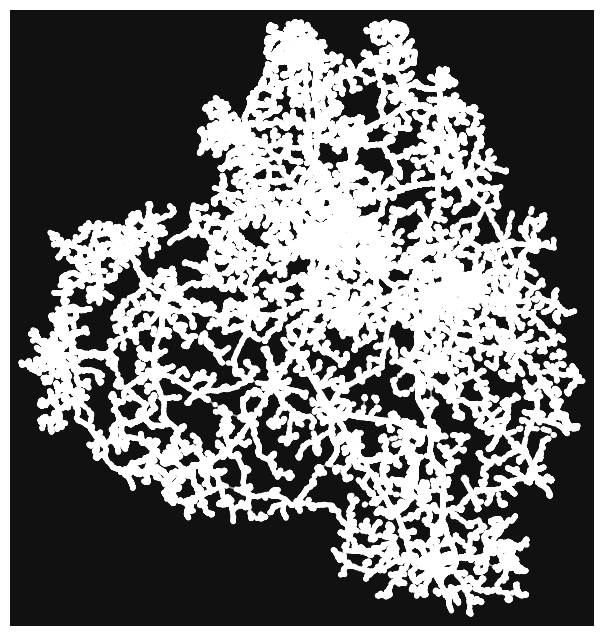

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
ox.plot_graph(G)

In [ ]:
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

ValueError: There are no attribute values.

In [ ]:
print(G)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MultiDiGraph with 20849 nodes and 58807 edges


In [ ]:
G = ox.graph_from_place('Moscow', simplify=True, retain_all=True, custom_filter='["bus"~"yes"]')
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G)
print(gdf_relationships)

                                                                         osmid  \
u           v           key                                                      
250954967   711057607   0                                            528949392   
251475648   5105396534  0                               [51728520, 1158124316]   
258828594   661191301   0                                             23879476   
258828602   661191300   0                                             23879476   
260680354   2592043829  0    [153479104, 260769186, 260769187, 1156588246, ...   
...                                                                        ...   
10865703486 10865703485 0                                           1168340111   
12158471517 12158471518 0                                           1313577106   
12158471518 12158471517 0                                           1313577106   
12258473040 12258473041 0                                           1324691527   
12258473041 1225

In [ ]:
place_name = "Тула"

# Получение графика дорожной сети для указанного местоположения
G = ox.graph_from_place(place_name, network_type = "drive")


In [ ]:
#ox.plot.plot_graph(G)
import networkx as nx
import matplotlib.pyplot as plt

graph = ox.graph_from_place("Тула", network_type='drive')
# Фильтруем граф, оставляя только те рёбра, которые имеют тег 'bus'
bus_edges = [(u, v, data) for u, v, data in graph.edges(data=True) if 'bus' in data.get('highway', '')]

# Создаем новый граф только с маршрутами автобусов
bus_graph = nx.DiGraph()  # или nx.Graph() в зависимости от ваших нужд
bus_graph.add_edges_from(bus_edges)

# Визуализируем граф
#fig, ax = ox.plot_graph(bus_graph)
#plt.title("Граф маршрутов автобусов")
#plt.show()
print(bus_graph)

DiGraph with 0 nodes and 0 edges


In [ ]:
import osmnx as ox


place_name = "Nootdorp, Netherlands"

# Retrieve the road network graph

G = ox.graph_from_place(place_name, network_type = "all")

# Filter the graph to include only bus routes
bus_routes = ox.utils_graph.get_largest_component(G)
bus_lines = [data['name']
   for u, v, key, data in bus_routes.edges(keys = True, data = True) if 'bus' in data.get('route_type', '')
]

print(bus_lines)

[]


<ipython-input-28-9fb0f9b4d7db>:11: FutureWarning: The `get_largest_component` function is deprecated and will be removed in the v2.0.0 release. Replace it with `truncate.largest_component` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  bus_routes = ox.utils_graph.get_largest_component(G)


In [ ]:
ox.geocode_to_gdf("Тула", which_result=2)

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,POINT (142.48440 47.51033),47.510379,47.510279,142.484453,142.484353,266145965,node,6094188120,47.510329,142.484403,natural,peak,18,0.30001,peak,Тула,"Тула, Dolinsky District, Sakhalin Oblast, Far ..."
